In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from generate_matrix import populate
import geopandas

# Helper functions

In [2]:
def save_clean(df :pd.DataFrame, value :str, filename :str):
    df.columns = [title.lower() for title in df.columns]
    df = df[["longitude", "latitude", value.lower()]]
    df.to_csv(f"data/clean/{filename}.csv", index=False)

def save_map(map :np.ndarray, filename :str):
    np.save(f"output/{filename}.npy", map)

# xMap

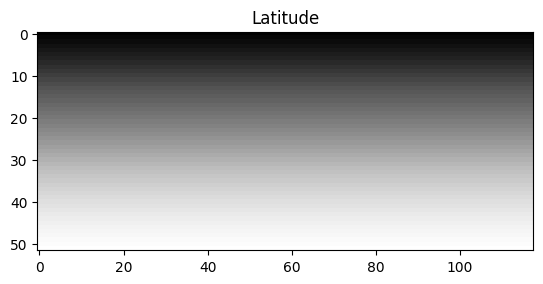

In [3]:
xmap = np.load("output/us_map.npy")[::-1]
plt.title("Latitude")
plt.imshow(xmap[:,:,0], cmap="Greys");

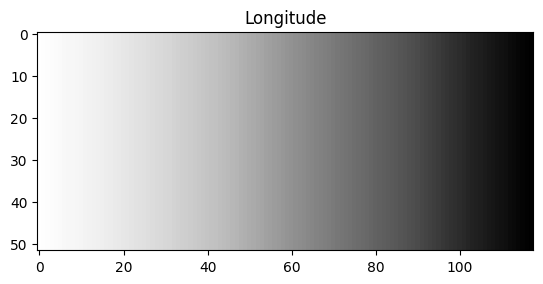

In [4]:
plt.title("Longitude")
plt.imshow(xmap[:,:,1], cmap="Greys");

In [5]:
xmap[-1,-1]

array([ 24. , -66.5])

# Territoires

### États-Unis

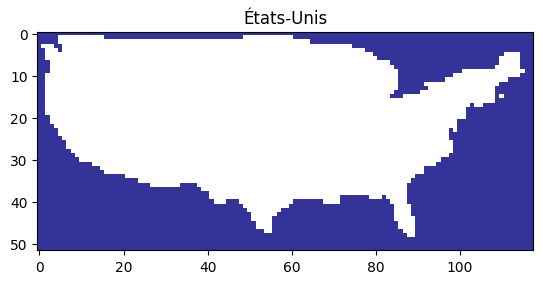

In [41]:
territory = np.load("output/us_landmass.npy")
plt.title("États-Unis")
plt.imshow(territory, cmap="terrain");

### Canada

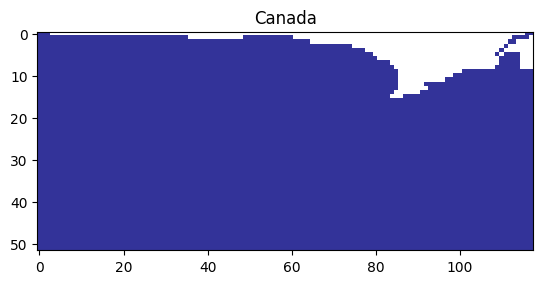

In [42]:
territory_can = np.load("output/can_landmass.npy")
plt.title("Canada")
plt.imshow(territory_can, cmap="terrain");

### Mexique

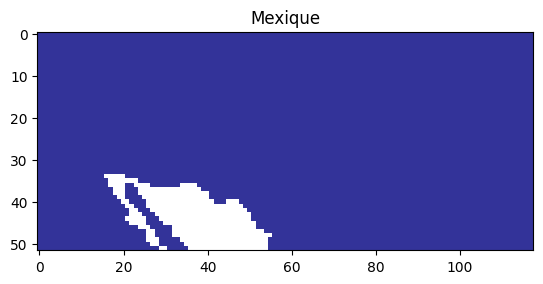

In [43]:
territory_mex = np.load("output/mex_landmass.npy")
plt.title("Mexique")
plt.imshow(territory_mex, cmap="terrain");

### Amerique du Nord

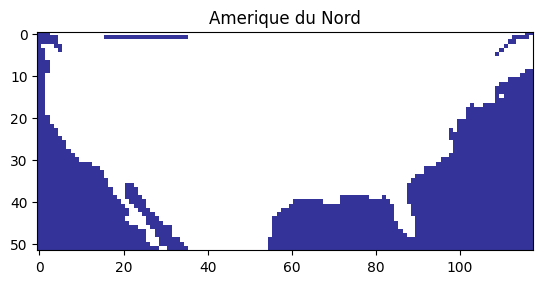

In [44]:
plt.title("Amerique du Nord")
plt.imshow(territory + territory_can + territory_mex, cmap="terrain");

In [46]:
xmap.shape

(52, 118, 2)

In [56]:
box_vol = (xmap.shape[0] * xmap.shape[1])/250
box_len = np.sqrt(box_vol)

In [61]:
vert = round(xmap.shape[0]/box_len, 0)
horz = round(xmap.shape[1]/box_len, 0)

In [75]:
np.ceil(xmap.shape[1]/horz)

5.0

In [91]:
centroids = {}
for lon in range(int(horz)):
    for lat in range(int(vert)):
        point = [lon * int(round(box_len, 0)) + int(round(box_len/2, 0)), lat * int(round(box_len, 0)) + int(round(box_len/2, 0))]
        box = [[lon*int(round(box_len, 0)), (lon+1)*int(round(box_len, 0))], [lat*int(round(box_len, 0)), (lat+1)*int(round(box_len, 0))]]
        try:
            lonlat = xmap[point[0], point[1]]
        except:
            if lon * box_len > xmap.shape[1]:
                point[1] = xmap.shape[1]
                box[0][1] = xmap.shape[1] - 1
                print(point[1])
            if lat * box_len > xmap.shape[0]:
                point[0] = xmap.shape[0]
                box[1][1] = xmap.shape[0] - 1
                print(point[0])
            lonlat = xmap[point[0], point[1]]
        centroids[f"point_{point[1]}_{point[0]}"] = {"point":point, "box":box}

IndexError: index 52 is out of bounds for axis 0 with size 52

In [85]:
centroids

{'point_2_2': {'point': [2, 2], 'box': [[0, 5], [0, 5]]},
 'point_7_2': {'point': [2, 7], 'box': [[0, 5], [5, 10]]},
 'point_12_2': {'point': [2, 12], 'box': [[0, 5], [10, 15]]},
 'point_17_2': {'point': [2, 17], 'box': [[0, 5], [15, 20]]},
 'point_22_2': {'point': [2, 22], 'box': [[0, 5], [20, 25]]},
 'point_27_2': {'point': [2, 27], 'box': [[0, 5], [25, 30]]},
 'point_32_2': {'point': [2, 32], 'box': [[0, 5], [30, 35]]},
 'point_37_2': {'point': [2, 37], 'box': [[0, 5], [35, 40]]},
 'point_42_2': {'point': [2, 42], 'box': [[0, 5], [40, 45]]},
 'point_47_2': {'point': [2, 47], 'box': [[0, 5], [45, 50]]},
 'point_2_7': {'point': [7, 2], 'box': [[5, 10], [0, 5]]},
 'point_7_7': {'point': [7, 7], 'box': [[5, 10], [5, 10]]},
 'point_12_7': {'point': [7, 12], 'box': [[5, 10], [10, 15]]},
 'point_17_7': {'point': [7, 17], 'box': [[5, 10], [15, 20]]},
 'point_22_7': {'point': [7, 22], 'box': [[5, 10], [20, 25]]},
 'point_27_7': {'point': [7, 27], 'box': [[5, 10], [25, 30]]},
 'point_32_7': {

# Altitude
Since API calls are restricted, we must seperate map into subareas

In [ ]:
def split_xmap(xmap, boxes_qty=250):
    area = xmap.shape[0] * xmap.shape[1]
    box_area = area/boxes_qty
    box_vert = np.ceil(np.sqrt(box_area))
    box_horz = box_vert

    centroids = {}
    for vert in range(map.shape[0] / box_vert):
        for horz in range(map.shape[1]/box_horz):
            centroid = []
            centroid += horz*()

# Data generation

### LNG terminals

In [108]:
lng = pd.read_excel('data/GEM-GGIT-LNG-Terminals-July2022_copy.xlsx')

lng =lng[(lng.Country == 'United States') & (lng.Status != 'Cancelled')]

excluded_states = ['Alaska', 'Puerto Rico', 'Hawaii', 'Penuelas']
for state in excluded_states:
    lng = lng[lng['State/Province'] != state]

lng['CapacityInMtpa'].replace('--', 0, inplace=True)
lng['StartYear1'] = pd.to_numeric(lng['StartYear1'], errors='coerce')

lng['Latitude'] = pd.to_numeric(lng['Latitude'], errors='coerce')
lng['Longitude'] = pd.to_numeric(lng['Longitude'], errors='coerce')

lng.head()

,TerminalID,ProjectID,ComboID,Country,Region,Wiki,TerminalName,UnitName,OtherEnglishNames,Owner,...,State/Province,Latitude,Longitude,Accuracy,Floating,FID,FIDYear,OtherLanguageName,PowerPlantsSupplied,OtherLanguageWikiPage
0,T0205,1,T020501,United States,North America,https://www.gem.wiki/Fourchon_LNG_Terminal,Fourchon LNG Terminal,Phase 1,Gulf Coast LNG Terminal,Fourchon LNG LLC [100.00%],...,Louisiana,29.105833,-90.194444,approximate,NaN,Pre-FID,NaN,NaN,NaN,NaN
1,T0205,2,T020502,United States,North America,https://www.gem.wiki/Fourchon_LNG_Terminal,Fourchon LNG Terminal,Phase 2,Gulf Coast LNG Terminal,Fourchon LNG LLC [100.00%],...,Louisiana,29.105833,-90.194444,approximate,NaN,Pre-FID,NaN,NaN,NaN,NaN
6,T0208,1,T020801,United States,North America,https://www.gem.wiki/American_LNG_Hialeah_Term...,American LNG Hialeah Terminal,NaN,NaN,Fortress Investment Group [100.00%],...,Florida,25.809175,-80.296697,approximate,NaN,NaN,NaN,NaN,NaN,NaN
7,T0209,1,T020901,United States,North America,https://www.gem.wiki/American_LNG_Titusville_T...,American LNG Titusville Terminal,NaN,NaN,American LNG Marketing LLC [100.00%],...,Florida,28.591111,-80.820000,approximate,NaN,NaN,NaN,NaN,NaN,NaN
14,T0212,1,T021201,United States,North America,https://www.gem.wiki/Calcasieu_Pass_LNG_Terminal,Calcasieu Pass LNG Terminal,T1,NaN,Venture Global Calcasieu Pass [100.00%],...,Louisiana,29.772927,-93.334304,exact,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
def adjust_capacity(cap, export):
    if export == "Export":
        return -cap
    else:
        return cap

lng['CapacityInMtpa'] = lng.apply(lambda x: adjust_capacity(x['CapacityInMtpa'], x['Import/Export']), axis=1)


lng_clean = lng[["Longitude", "Latitude", "CapacityInMtpa"]]
lng_clean.head()

,Longitude,Latitude,CapacityInMtpa
0,-90.194444,29.105833,-2.00
1,-90.194444,29.105833,-3.00
6,-80.296697,25.809175,-0.06
7,-80.820000,28.591111,-0.63
14,-93.334304,29.772927,-0.67


In [110]:
save_clean(lng_clean, "CapacityInMtpa", "lng_terminals")

In [181]:
lng_map = populate(xmap, lng_clean.longitude.to_list(), lng_clean.latitude.to_list(), lng_clean.capacityinmtpa.to_list())
save_map(lng_map, "lng_terminals")

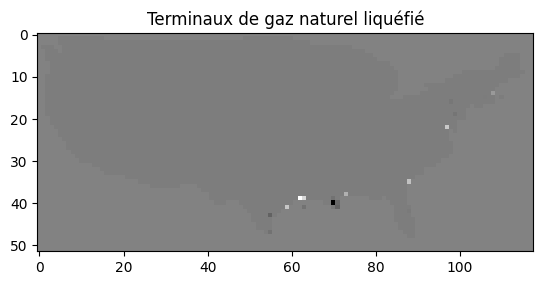

In [182]:
plt.title("Terminaux de gaz naturel liquéfié")
plt.imshow(territory-lng_map, cmap="Greys")

## Alternative fuel stations

### Electric car stations

In [39]:
station = pd.read_csv("data/Alternative_Fueling_Stations.csv", low_memory=False)
elec = station[station["fuel_type_code"]=="ELEC"][["latitude", "longitude"]]
elec["val"] = 1
elec.reset_index(drop=True, inplace=True)
save_clean(elec, "val", "elec_stations_clean")
elec.head()

,latitude,longitude,val
0,34.248319,-118.387971,1
1,34.052542,-118.448504,1
2,34.040539,-118.271387,1
3,34.059133,-118.248589,1
4,33.759802,-118.096665,1


In [17]:
elec_map = populate(xmap, elec.longitude.to_list(), elec.latitude.to_list(), elec.val.to_list())

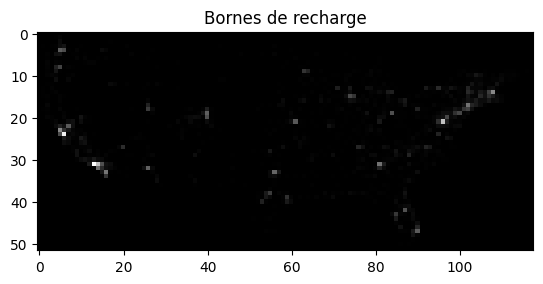

In [25]:
plt.title("Bornes de recharge")
plt.imshow(territory - elec_map, cmap="Greys");

In [26]:
save_map(elec_map, "elec_stations")

### Liquified petroleum gas

In [45]:
lpg = station[station["fuel_type_code"]=="LPG"][["latitude", "longitude"]]
lpg["val"] = 1
lpg.reset_index(drop=True, inplace=True)
save_clean(lpg, "val", "lpg_stations_clean")
lpg.head()

,latitude,longitude,val
0,42.660919,-88.522923,1
1,35.267353,-101.885391,1
2,46.842162,-68.009825,1
3,41.082789,-73.429554,1
4,40.782618,-74.232109,1


In [33]:
lpg_map = populate(xmap, lpg.longitude.to_list(), lpg.latitude.to_list(), lpg.val.to_list())

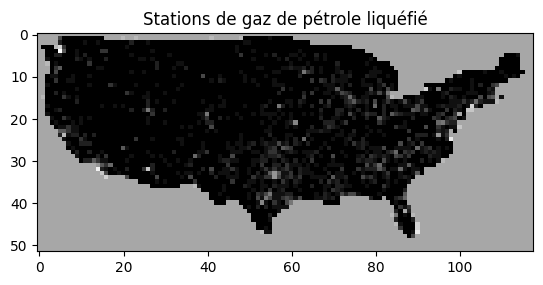

In [50]:
plt.title("Stations de gaz de pétrole liquéfié")
plt.imshow(territory*10 - lpg_map, cmap="Greys");

In [54]:
save_map(lpg_map, "lpg_stations")

### Compressed natural gas

In [44]:
cng = station[station["fuel_type_code"]=="CNG"][["latitude", "longitude"]]
cng["val"] = 1
cng.reset_index(drop=True, inplace=True)
save_clean(cng, "val", "cng_stations_clean")
cng.head()

,latitude,longitude,val
0,32.367916,-86.267021,1
1,33.821911,-84.367461,1
2,33.760256,-84.543822,1
3,35.362213,-94.375338,1
4,42.374706,-71.026549,1


In [46]:
cng_map = populate(xmap, cng.longitude.to_list(), cng.latitude.to_list(), cng.val.to_list())

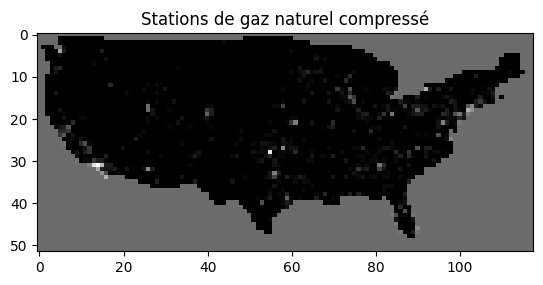

In [53]:
plt.title("Stations de gaz naturel compressé")
plt.imshow(territory*10 - cng_map, cmap="Greys");

In [55]:
save_map(cng_map, "cng_stations")

### Ethanol stations (E85)

In [58]:
e85 = station[station["fuel_type_code"]=="E85"][["latitude", "longitude"]]
e85["val"] = 1
e85.reset_index(drop=True, inplace=True)
save_clean(e85, "val", "e85_stations_clean")
e85.head()

,latitude,longitude,val
0,40.856204,-96.717819,1
1,40.811394,-96.699689,1
2,40.917010,-98.379743,1
3,44.904113,-97.130798,1
4,44.007690,-97.146785,1


In [59]:
e85_map = populate(xmap, e85.longitude.to_list(), e85.latitude.to_list(), e85.val.to_list())

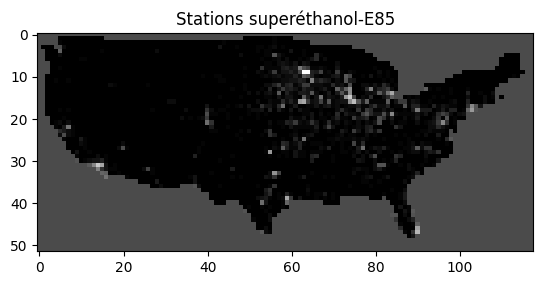

In [62]:
plt.title("Stations superéthanol-E85")
plt.imshow(territory*10 - e85_map, cmap="Greys");

In [63]:
save_map(e85_map, "e85_stations")

### Urban centers

In [69]:
city = pd.read_csv("data/american_cities.csv")
city = city[['lng', 'lat', 'population']]
city.columns = ['longitude', "latitude", "population"]
save_clean(city, "population", "cities_clean")
city

,longitude,latitude,population
0,-73.9249,40.6943,19354922
1,-118.4068,34.1139,12815475
2,-87.6861,41.8373,8675982
3,-80.2102,25.7840,6381966
4,-96.7662,32.7937,5733259
...,...,...,...
900,-89.6990,35.0474,50286
901,-71.1889,42.7340,50259
902,-81.8008,41.4824,50249
903,-112.0197,46.5964,50227


In [70]:
city_map = populate(xmap, city.longitude.to_list(), city.latitude.to_list(), city.population.to_list())

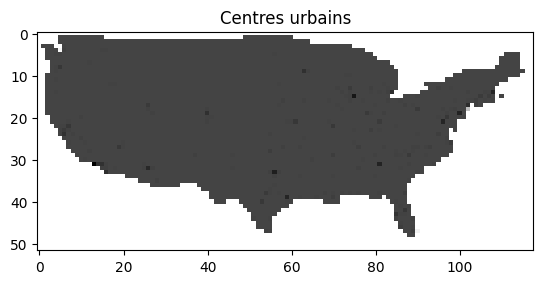

In [96]:
plt.title("Centres urbains")
plt.imshow(territory*10000 + city_map/5000, cmap="Greys");

### Airports

In [113]:
airports = geopandas.read_file("data/GeoJSON/Intermodal_Freight_Facilities_Air-to-Truck.geojson")

longitude = []
latitude = []
for i in range(len(airports.index)):
    longitude += [airports.geometry[i].coords[0][0]]
    latitude += [airports.geometry[i].coords[0][1]]

airports = pd.DataFrame([longitude, latitude]).transpose()

airports.columns = ["longitude", "latitude"]

airports["val"] = 1
airports
save_clean(airports, "val", "airports_clean")

In [261]:
airports_map = populate(xmap, airports.longitude.to_list(), airports.latitude.to_list(), airports.val.to_list())

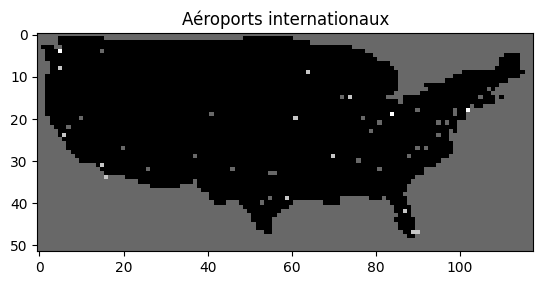

In [262]:
plt.title("Aéroports internationaux")
plt.imshow(territory - airports_map, cmap="Greys")

In [263]:
save_map(airports_map, "airports")

### Transit stops
This dataset shows stops where vehicles pick up or drop off riders, along with defining the stations and station entrances.
<a href="https://data-usdot.opendata.arcgis.com/datasets/usdot::national-transit-map-stops/about">View</a>

In [252]:
stops = geopandas.read_file("data/GeoJSON/National_Transit_Map_Stops.geojson")

In [253]:
longitude = []
latitude = []
for i in range(len(stops.index)):
    longitude += [stops.geometry[i].coords[0][0]]
    latitude += [stops.geometry[i].coords[0][1]]

stops = pd.DataFrame([longitude, latitude]).transpose()

In [254]:
stops.columns = ["longitude", "latitude"]

stops["val"] = 1
save_clean(stops, "val", "transit_stops_clean")

In [259]:
stops_map = populate(xmap, stops.longitude.to_list(), stops.latitude.to_list(), stops.val.to_list())

In [264]:
save_map(stops_map, "transit_stops")

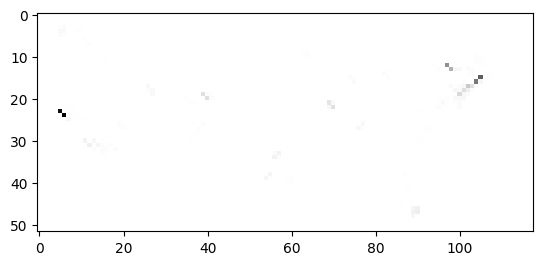

In [260]:
plt.imshow(stops_map, cmap="Greys")

### Truck stop parkings

In [107]:
truck = pd.read_csv("data/Truck_Stop_Parking.csv")
truck = truck[["Latitude", "Longitude", "Number_of"]]
save_clean(truck, "Number_of", "truck_stops_clean")
truck

,latitude,longitude,number_of
0,30.477238,-88.393032,90
1,30.575718,-87.418285,27
2,31.006808,-85.407686,8
3,31.090454,-86.296196,5
4,31.336613,-87.114501,22
...,...,...,...
1910,43.853000,-101.929000,15
1911,42.647000,-96.629000,19
1912,43.610000,-96.462518,7
1913,43.886000,-100.803000,12


In [112]:
truck_map = populate(xmap, truck.longitude.to_list(), truck.latitude.to_list(), truck["number_of"].to_list())

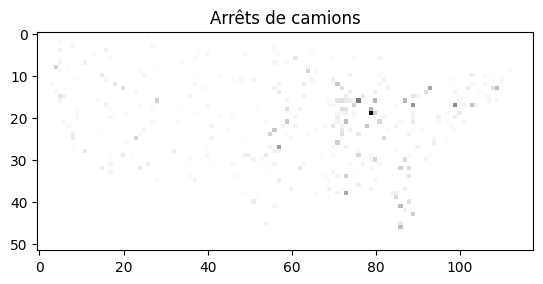

In [124]:
plt.title("Arrêts de camions")
plt.imshow(truck_map*10000 +500, cmap="Greys");

In [120]:
save_map(truck_map, "truck_stops")

### Railroad nodes

In [128]:
rlrd = geopandas.read_file("data/North_American_Rail_Network_Nodes.geojson")

In [132]:
longitude = []
latitude = []
for i in range(len(rlrd.index)):
    longitude += [rlrd.geometry[i].coords[0][0]]
    latitude += [rlrd.geometry[i].coords[0][1]]
    
rlrd_clean = pd.DataFrame([longitude, latitude]).transpose()

In [136]:
rlrd_clean["val"] = 1
rlrd_clean.columns = ["longitude", "latitude", "val"]
save_clean(rlrd_clean, "val", "railroad_clean")
rlrd_clean.head()

,longitude,latitude,val
0,-156.689726,20.936530,1
1,-156.689724,20.939155,1
2,-156.679321,20.880145,1
3,-156.678633,20.881020,1
4,-150.123363,62.391744,1


In [137]:
rlrd_map = populate(xmap, rlrd_clean.longitude.to_list(), rlrd_clean.latitude.to_list(), rlrd_clean.val.to_list())

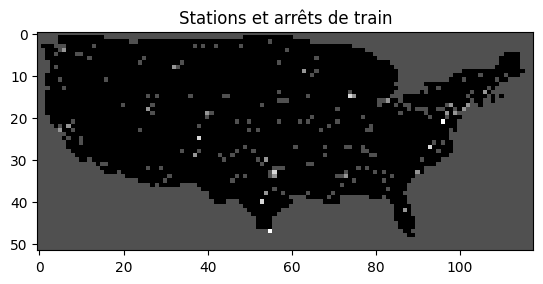

In [140]:
plt.title("Stations et arrêts de train")
plt.imshow(territory - rlrd_map*territory, cmap="Greys");

In [151]:
save_map(rlrd_map, "rlrd_nodes")

### Ferry terminals

In [10]:
ferry = pd.read_csv("data/Ferry_Terminals.csv")
ferry = ferry[["longitude", "latitude"]]
ferry["val"] = 1
save_clean(ferry, "val", "ferry_clean")

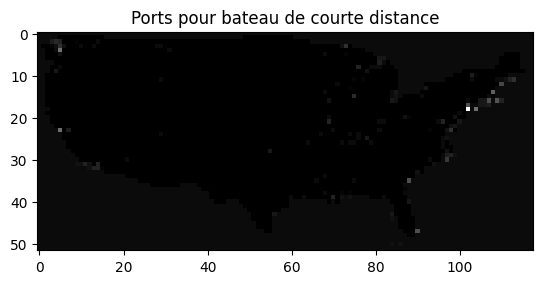

In [19]:
ferry_map = populate(xmap, ferry.longitude.to_list(), ferry.latitude.to_list(), ferry.val.to_list())
plt.title("Ports pour bateau de courte distance")
plt.imshow(territory*2 - ferry_map, cmap="Greys");

In [20]:
save_map(ferry_map, "ferry_terminals")

### Docks

In [32]:
docks = pd.read_csv("data/Docks.csv")
docks = docks[['LONGITUDE1', "LATITUDE1"]]
docks.columns = ['longitude', 'latitude']
docks["val"] = 1
save_clean(docks, "val", "docks_clean")

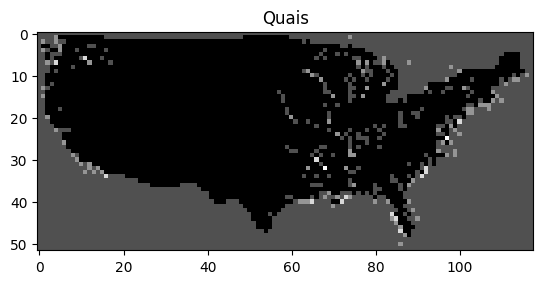

In [35]:
docks_map = populate(xmap, docks.longitude.to_list(), docks.latitude.to_list(), docks.val.to_list())
plt.title("Quais")
plt.imshow(territory - docks_map, cmap="Greys");

In [36]:
save_map(docks_map, "docks")

In [29]:
gb = docks.groupby("PURPOSE").count()
gb

,X,Y,OBJECTID,ID,NAV_UNIT_I,UNLOCODE,NAV_UNIT_N,LOCATION_D,FACILITY_T,STREET_ADD,...,VERTICAL_D,DEPTH_MIN,DEPTH_MAX,BERTHING_L,BERTHING_T,DECK_HEIGH,DECK_HEIG1,SERVICE_IN,SERVICE_TE,SE_ANNO_CAD_DATA
PURPOSE,,,,,,,,,,,,,,,,,,,,,
,14970,14970,14970,14970,14970,14970,14970,14970,14970,14970,...,14970,14970,14970,14970,14970,14970,14970,14970,14970,0
"Building Materials, Hardware, Garden Supply & Mobile Home Dealers \r\nReady Mixed \r\n",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
"!!!!SHIPS ONLY!!!!\r\nDRY DISTILLERS GRAIN PRODUCT OF ETHANOL, ETHANOL",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
"100,000 bulk commodities at Berth #2\r\n65,000 buld commodities at Berth #4",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
"200,000 tons of dry storage at West Harbor Arm Berth #15\r\n100,000 tons of liquid storage at East Harbor ARm Berth #1\r\n",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
necessary to help accommodate increased vessel volume and improve navigational safety for vessels transiting this river section.,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
receipt of petroleum coke and limestone,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
"receiving grains, soybeans, their byproducts and other bulk commodities and efficiently shipping them either domestically or to the export market.\r\n",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [143]:
groads = geopandas.read_file("data/groads-v1-americas-shp/gROADS-v1-americas.shp")

In [1]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="My app 2")
geo = geolocator.geocode(f"Inland Empire")


In [9]:
geo.point.longitude

-120.900773

In [15]:
import time
import pandas as pd

In [16]:
zipcode_prop_price = pd.read_csv("data/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
zipcodes = zipcode_prop_price.groupby(["CountyName", "State"]).count()
zipcodes.reset_index(inplace=True)
zipcodes

,CountyName,State,RegionID,SizeRank,RegionName,RegionType,StateName,City,Metro,2000-01-31,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
0,Abbeville County,SC,4,4,4,4,4,4,0,4,...,4,4,4,4,4,4,4,4,4,4
1,Acadia Parish,LA,5,5,5,5,5,5,5,0,...,5,5,5,5,5,5,5,5,5,5
2,Accomack County,VA,13,13,13,13,13,13,0,0,...,13,13,13,13,13,13,13,13,13,13
3,Ada County,ID,15,15,15,15,15,14,15,0,...,15,15,15,15,15,15,15,15,15,15
4,Adair County,IA,6,6,6,6,6,6,0,0,...,3,3,3,3,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,Yuba County,CA,9,9,9,9,9,9,9,0,...,9,9,9,9,9,9,9,9,9,9
2894,Yuma County,AZ,7,7,7,7,7,7,7,0,...,7,7,7,7,7,7,7,7,7,7
2895,Yuma County,CO,7,7,7,7,7,7,0,0,...,7,7,7,7,7,7,7,7,7,7
2896,Zapata County,TX,2,2,2,2,2,2,2,0,...,2,2,2,2,2,2,2,2,2,2


In [17]:
zip_groups = {i: pd.DataFrame() for i in range(11)}

for i in range(11):
    try:
        if i == 0:
            zip_groups[i] = zipcodes.iloc[i: 280]
        else:
            zip_groups[i] = zipcodes.iloc[i*280: (i+1)*280]
    
    except:
        zip_groups[i] = zipcodes.iloc[i*280: -1]

In [18]:
zip_groups[10].index[-1]

2897

In [19]:
counties = []
states = []
longitude = []
latitude = []

GROUP = 1

for i in zip_groups[GROUP].index:
    
    location = geolocator.geocode(f"{zip_groups[GROUP]['CountyName'][i]}, {zip_groups[GROUP]['State'][i]}")
    identity = f"{zip_groups[GROUP]['CountyName'][i]}, {zip_groups[GROUP]['State'][i]}"
    counties += [zip_groups[GROUP]['CountyName'][i]]
    states += [zip_groups[GROUP]['State'][i]]
    longitude += [location.longitude]
    latitude += [location.latitude]
    print(identity + " "*10, end="\x1b[1K\r")

df = pd.DataFrame([states, counties, longitude, latitude]).transpose()
df.columns = ["State", "County", "longitude", "latitude"]
df.to_csv(f"temp/zip_group_{GROUP}.csv")


GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Buena+Vista+City%2C+VA&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

In [18]:
df = pd.DataFrame([states, counties, longitude, latitude]).transpose()
df.columns = ["State", "County", "longitude", "latitude"]
df.to_csv("data/clean/counties.csv")

In [20]:
df = pd.DataFrame([states, counties, longitude, latitude]).transpose()
df.columns = ["State", "County", "longitude", "latitude"]

In [21]:
len(df)

280

In [65]:
zipcode_prop_price[zipcode_prop_price["CountyName"] == "Lincoln County"]

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
1759,69710,1759,28092,zip,NC,NC,Lincolnton,"Charlotte-Concord-Gastonia, NC-SC",Lincoln County,98153.0,...,254241.0,260801.0,267599.0,271906.0,276513.0,279732.0,281934.0,283693.0,284201.0,285304.0
3828,88326,3829,69101,zip,NE,NE,North Platte,"North Platte, NE",Lincoln County,NaN,...,191098.0,191361.0,191636.0,192136.0,193666.0,195202.0,196877.0,197872.0,199143.0,198426.0
4928,83141,4930,57108,zip,SD,SD,Sioux Falls,"Sioux Falls, SD",Lincoln County,NaN,...,434135.0,438746.0,443080.0,444060.0,448584.0,453145.0,457840.0,460383.0,463376.0,466476.0
5018,86029,5019,63379,zip,MO,MO,Troy,"St. Louis, MO-IL",Lincoln County,NaN,...,260860.0,264746.0,269256.0,272992.0,276987.0,279084.0,280787.0,282211.0,283860.0,284059.0
5304,75367,5306,39601,zip,MS,MS,Brookhaven,"Brookhaven, MS",Lincoln County,NaN,...,146813.0,147802.0,149116.0,149852.0,151640.0,153327.0,155058.0,155409.0,155951.0,157464.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26343,93541,29192,80804,zip,CO,CO,Arriba,NaN,Lincoln County,NaN,...,148614.0,150414.0,151372.0,152813.0,154359.0,155915.0,157461.0,159842.0,162223.0,160279.0
26516,99228,29655,97369,zip,OR,OR,Depoe Bay,"Newport, OR",Lincoln County,156721.0,...,540262.0,556082.0,571916.0,590504.0,605221.0,618479.0,628180.0,630918.0,630006.0,624866.0
26547,95626,29747,88341,zip,NM,NM,Carrizozo,"Ruidoso, NM",Lincoln County,NaN,...,321264.0,323216.0,326502.0,327847.0,330738.0,332781.0,334498.0,335411.0,336108.0,340035.0
27007,90238,30657,74026,zip,OK,OK,Davenport,"Oklahoma City, OK",Lincoln County,35617.0,...,75148.0,75695.0,76324.0,76216.0,76973.0,77847.0,79304.0,79752.0,80539.0,80846.0


,CountyName,State,RegionID,SizeRank,RegionName,RegionType,StateName,City,Metro,2000-01-31,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
0,Abbeville County,SC,4,4,4,4,4,4,0,4,...,4,4,4,4,4,4,4,4,4,4
1,Acadia Parish,LA,5,5,5,5,5,5,5,0,...,5,5,5,5,5,5,5,5,5,5
2,Accomack County,VA,13,13,13,13,13,13,0,0,...,13,13,13,13,13,13,13,13,13,13
3,Ada County,ID,15,15,15,15,15,14,15,0,...,15,15,15,15,15,15,15,15,15,15
4,Adair County,IA,6,6,6,6,6,6,0,0,...,3,3,3,3,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,Yuba County,CA,9,9,9,9,9,9,9,0,...,9,9,9,9,9,9,9,9,9,9
2894,Yuma County,AZ,7,7,7,7,7,7,7,0,...,7,7,7,7,7,7,7,7,7,7
2895,Yuma County,CO,7,7,7,7,7,7,0,0,...,7,7,7,7,7,7,7,7,7,7
2896,Zapata County,TX,2,2,2,2,2,2,2,0,...,2,2,2,2,2,2,2,2,2,2
